In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Average trip duration change during the week

In [3]:
# First, we load the file and create DataFrame
taxi = pd.read_csv('yellow_tripdata_2018-06.csv')
taxi.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.00,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.30,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
5,1,2018-06-01 00:09:00,2018-06-01 00:24:01,1,2.00,1,N,161,234,1,11.5,0.5,0.5,2.55,0.0,0.3,15.35
6,1,2018-06-01 00:02:33,2018-06-01 00:13:01,2,1.50,1,N,163,233,1,8.5,0.5,0.5,1.95,0.0,0.3,11.75
7,1,2018-06-01 00:13:23,2018-06-01 00:16:52,1,0.70,1,N,186,246,1,5.0,0.5,0.5,1.85,0.0,0.3,8.15
8,1,2018-06-01 00:24:29,2018-06-01 01:08:43,1,5.70,1,N,230,179,2,22.0,0.5,0.5,0.00,0.0,0.3,23.30
9,2,2018-06-01 00:17:01,2018-06-01 00:23:16,1,0.85,1,N,179,223,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30


In [4]:
# Here we check types of data in order to understand how to work with it
taxi.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [5]:
# In order to calculate time differences, we should change column types of tpep_pickup_datetime and tpep_dropoff_datetime
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi.tpep_pickup_datetime)
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi.tpep_dropoff_datetime)

In [6]:
# Now we can calculate the duration of each trip
taxi['duration'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']

In [7]:
# Let's find out which week numbers are presented in this dataset
taxi['week'] = taxi['tpep_pickup_datetime'].dt.week
# We can check the correctness of the data by selecting distinct values in week column
taxi['week'].unique()

array([22,  1, 25, 23, 26, 29, 32, 35, 38, 41, 45, 48, 51,  2,  5,  8, 24,
       39, 27, 30, 33, 36, 42, 11, 14, 17], dtype=int64)

##### Above we can see that we have extra data which are not related to our month (June) or year (2018). In June 2018 we have such week numbers as 22, 23, 24, 25 and 26. It means we can drop extra data, because our period of analysis is only June, 2018.

In [8]:
# Choosing relevant data
weeks = np.arange(22, 27)
taxi = taxi[taxi['week'].isin(weeks)]

In [9]:
# Here we find the day of the week with Monday=0, Sunday=6
taxi['weekday'] = taxi['tpep_pickup_datetime'].dt.weekday

In [10]:
# Let's group the duration of trips by weekday
taxi['duration'] = taxi['duration'].dt.seconds
group = taxi['duration'].groupby(taxi['weekday'])
avg = group.mean()/60
print(avg)

weekday
0    16.857729
1    17.542354
2    18.017759
3    18.984727
4    18.275973
5    16.422865
6    17.151290
Name: duration, dtype: float64


In [11]:
avg.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg

Monday       16.857729
Tuesday      17.542354
Wednesday    18.017759
Thursday     18.984727
Friday       18.275973
Saturday     16.422865
Sunday       17.151290
Name: duration, dtype: float64

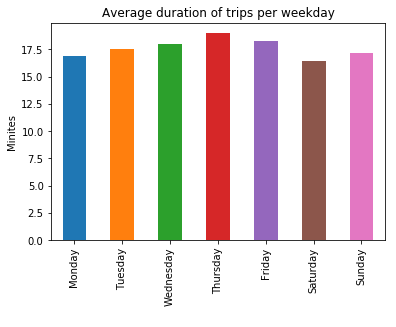

In [12]:
# Creating the bar chart
avg.plot.bar()
plt.xlabel(' ')
plt.ylabel('Minites')
plt.title('Average duration of trips per weekday');
plt.show()

##### Above you can see average duration of trips in minutes per weekday in June. First, average duration of trips per weekday varies from 16 min to 19 min. The highest average duration of trips is on Thursday (approximately equals to 19 min). The smallest average duration of trips is on Saturday (approximately equals to 16 min). Further we can see duration increase between Monday and Thursday and decrease between Thursday and Saturday.

## 2. The highest average trip fare between different pairs of boroughs

In [190]:
# We select only different pairs of boroughs, where PULocationID doesn't equal to DOLocation
bor = taxi[['PULocationID', 'DOLocationID', 'total_amount']].assign(Not_equal=taxi.PULocationID != taxi.DOLocationID)
bor.shape

(8713674, 4)

In [191]:
bor = bor[bor.Not_equal != False]
bor = bor.reset_index()
bor.shape

(8151005, 5)

In [192]:
# We consider that pairs like (a, b) and (b, a) are the same. In this part we can sort values in columns PULocationID and DOLocationID (horizontally, ascending) 
s_bor = bor.copy()
s_bor.drop(columns=['index', 'Not_equal'], inplace=True)
p = s_bor['PULocationID'].values
d = s_bor['DOLocationID'].values
for i in range(len(p)):
    if p[i] > d[i]:
        p[i], d[i] = d[i], p[i]
s_bor.drop(columns=['PULocationID', 'DOLocationID'], axis=1, inplace=True)
s_bor.insert(loc=0, column='DOLocationID', value=d)
s_bor.insert(loc=0, column='PULocationID', value=p)
s_bor.head()

,PULocationID,DOLocationID,total_amount
0,161,230,8.15
1,100,263,14.30
2,161,234,15.35
3,163,233,11.75
4,186,246,8.15


Text(0, 0.5, 'Total amount')

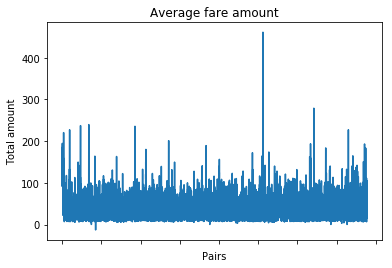

In [193]:
# Calculating the highest average fare amount
means = s_bor.groupby(['PULocationID', 'DOLocationID'])['total_amount'].mean()
means.plot()
plt.title('Average fare amount')
plt.xlabel('Pairs')
plt.ylabel('Total amount')

In [194]:
max_val = np.max(means.values)
max_val

461.3

In [195]:
print(*means[means  == max_val].index.tolist()) 

(118, 265)


## (118, 265) results in the highest average trip fare which equals to 461.3 dollars

## 3. Drivers are unsatisfied with fares from Manhattan during evening peak hours on working days. Management team wants to introduce subsidies in such hours. Identify which hours are most likely the problem ones and estimate possible value of X considering monthly budget of $6mln.

In [17]:
zone = pd.read_csv('taxi _zone_lookup.csv')
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [18]:
zone = zone[['LocationID','Borough', 'service_zone']]
zone = zone[zone.Borough == 'Manhattan'] 
zone = zone[zone.service_zone == 'Yellow Zone']
locations = zone.LocationID.values
locations

array([  4,  12,  13,  24,  43,  45,  48,  50,  68,  79,  87,  88,  90,
       100, 103, 104, 105, 107, 113, 114, 125, 137, 140, 141, 142, 143,
       144, 148, 151, 158, 161, 162, 163, 164, 170, 186, 194, 209, 211,
       224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 246, 249,
       261, 262, 263], dtype=int64)

In [19]:
rush = taxi[(taxi['PULocationID'].isin(locations) | taxi['DOLocationID'].isin(locations))]
rush = taxi[taxi['extra'] == 0.5]
rush.reset_index().head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,week
0,0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30,66,22
1,1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15,300,22
2,2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,907,22
3,3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,4,22
4,4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80,4,22


In [20]:
days = np.arange(5)
rush = rush[rush['tpep_pickup_datetime'].dt.weekday.isin(days)]

In [21]:
rush = rush.assign(pickup_hour=pd.Series(rush['tpep_pickup_datetime'].dt.hour))
rush = rush.assign(dropoff_hour=pd.Series(rush['tpep_dropoff_datetime'].dt.hour))

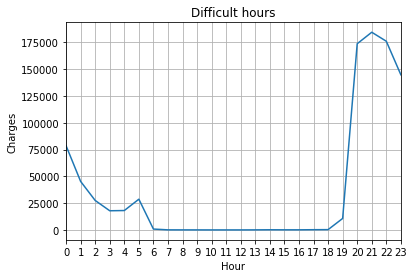

In [22]:
rush.groupby(['pickup_hour'])['extra'].sum().plot()
plt.title('Difficult hours')
plt.xlabel('Hour')
plt.ylabel('Сharges')
plt.xlim(0, 23)
plt.xticks(np.arange(0, 24))
plt.grid()

In [23]:
money = rush.groupby(['pickup_hour'])['extra'].sum()
X_per_month = money[19:23].sum()
X_per_ride = 6000000 / (X_per_month / 0.5)
print('{0}$'.format(round(X_per_ride, 3)))

5.511$


## Evening peak hours are between 19 p.m. and 22 p.m.
## X_per_ride = 5.511$